In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
locations=np.loadtxt('locations_output_sine_201120.txt')

In [33]:
locations.shape

(50,)

In [36]:
samples=np.loadtxt('samples_output_sone_201120.txt')

In [37]:
#5 functions (i=1,...5) evaluated at 50 locations
samples.shape[0]

20

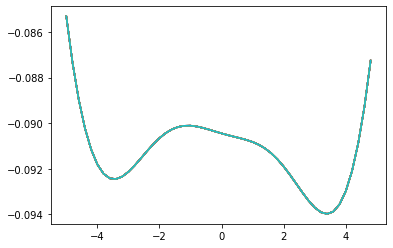

In [38]:
#for each function f_i, for i=1 to N=5, we plot the function evaluations at the K locations
for i in range(samples.shape[0]):
    plt.plot(locations, samples[i, :])
plt.show()

In [39]:
def plot_posterior_samples(model, samples, s_star, x_star):
    test_points = torch.arange(-5, 5, 0.1).double()
    for i in range(samples.shape[0]):
        func = model.eval_at_z(samples[i,:], test_points.unsqueeze(1))
        plt.plot(test_points.detach().cpu().numpy(),
            func.detach().cpu().numpy(), alpha=0.1)
    plt.scatter(s_star.detach().cpu().numpy(), x_star.detach().cpu().numpy(),
        s=1000, marker="+")
    plt.show()

In [40]:
#Hyperparams
beta_dim = 100
input_dim = 1
num_phi_rbf = 100
phi_rbf_sigma = 5
phi_hidden_layer_size = 10
z_dim = 16
num_training_funcs = 1000 # Gives the numbers of betas to learn
num_eval_points = 20 # Number of points each function is evaluated at
obs_sigma = 0.01 # The observation standard deviation

encoder_h_dim_1 = 512
encoder_h_dim_2 = 512
encoder_h_dim_3 = 128

decoder_h_dim_1 = 128
decoder_h_dim_2 = 128
decoder_h_dim_3 = 128

function_xlims = [-5, 5]

In [41]:
all_samples=np.loadtxt('all_samples_output_sine_3pts.txt')

In [42]:
s_star=np.loadtxt('s_star_output_sine_3pts.txt')
x_star=np.loadtxt('x_star_output_sine_3pts.txt')
test_points=np.loadtxt('test_points_out.txt')
all_funcs=np.loadtxt('all_funcs_out_3pts.txt')
mcmc_samples_output=np.loadtxt('mcmc_samples_output_sine_3pts.txt')

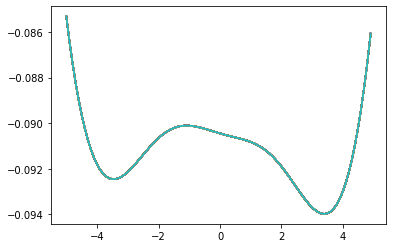

In [43]:
for i in range (all_funcs.shape[0]):
    plt.plot(test_points, all_funcs[i,:])

In [44]:
func_mean = np.mean(all_funcs, axis=0)
func_std = np.std(all_funcs, axis=0)

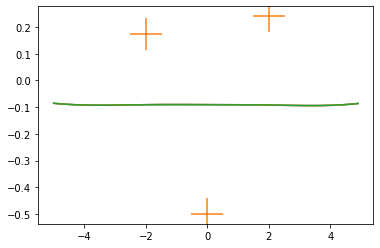

In [45]:
plt.plot(test_points, func_mean)
plt.plot(test_points, func_mean + func_std)
plt.plot(test_points, func_mean - func_std)
plt.fill_between(test_points, func_mean - func_std, func_mean + func_std, alpha=0.1)
plt.scatter(s_star, x_star, s=1000, marker="+")
plt.show()